In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

without_features = pd.read_csv('WithoutFeature.csv', decimal=",", header=[1])
feature_extraction = pd.read_csv('FeatureExtraction.csv', decimal=",", header=[1])
feature_wrapper = pd.read_csv('FeatureSelectionWrapper.csv', decimal=",", header=[1])
feature_filtering = pd.read_csv('FeatureSelectionFilter.csv', decimal=",", header=[1])
feature_filtering.head()

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Accuracy.1,Precision.1,Sensitivity.1,Specificity.1,F1 Score.1,Time
0,Forest 30 Tree,0.954757,0.963579,0.976165,0.893778,0.969758,0.010946,0.011398,0.010904,0.031299,0.007296,15.628697
1,8 neighbour,0.950924,0.983144,0.950336,0.953272,0.966433,0.009267,0.006830,0.009050,0.017453,0.006186,148.645597
2,10-50-50,0.991379,0.993714,0.994918,0.980350,0.994296,0.011341,0.009600,0.007329,0.032524,0.007328,552.696497
3,"SVC C=0,01",0.965488,0.975864,0.977864,0.929992,0.976801,0.006078,0.008219,0.009253,0.023944,0.004008,356.055397


In [104]:
without_features_stacked = pd.melt(without_features, id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
feature_extraction_stacked = pd.melt(feature_extraction, id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
feature_wrapper_stacked = pd.melt(feature_wrapper, id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
feature_filtering_stacked = pd.melt(feature_filtering, id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
without_features_stacked_2 = pd.melt(without_features, id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')
feature_extraction_stacked_2 = pd.melt(feature_extraction, id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')
feature_wrapper_stacked_2 = pd.melt(feature_wrapper, id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')
feature_filtering_stacked_2 = pd.melt(feature_filtering, id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')

without_features_stacked_2.head()

,Algorithm,Metric,Std
0,Forest 30 Tree,Accuracy.1,0.009605
1,8 neighbour,Accuracy.1,0.006845
2,10-50-50,Accuracy.1,0.011885
3,"SVC C=0,01",Accuracy.1,0.007109
4,Forest 30 Tree,Precision.1,0.010049


In [105]:
without_features_stacked['Std'] = without_features_stacked_2['Std']
feature_extraction_stacked['Std'] = feature_extraction_stacked_2['Std']
feature_wrapper_stacked['Std'] = feature_wrapper_stacked_2['Std']
feature_filtering_stacked['Std'] = feature_filtering_stacked_2['Std']

feature_filtering_stacked.head()

,Algorithm,Metric,Percentage,Std
0,Forest 30 Tree,Accuracy,0.954757,0.010946
1,8 neighbour,Accuracy,0.950924,0.009267
2,10-50-50,Accuracy,0.991379,0.011341
3,"SVC C=0,01",Accuracy,0.965488,0.006078
4,Forest 30 Tree,Precision,0.963579,0.011398


In [106]:
dfCopy = without_features_stacked.copy()
duplicates = 30 # increase this number to increase precision
for index, row in without_features_stacked.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

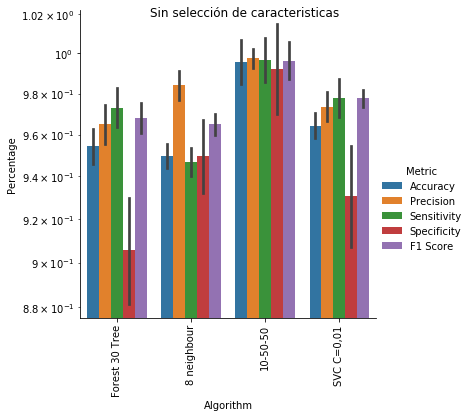

In [107]:
graph = sns.catplot(x="Algorithm", y="Percentage", ci="sd", hue='Metric', kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Sin selección de caracteristicas')
graph.savefig('Graphs/WithoutFeature.jpg')

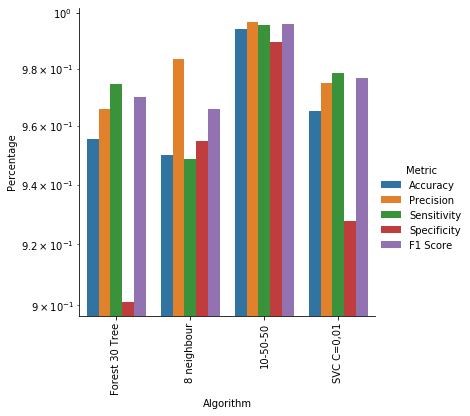

In [65]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=without_features_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

In [108]:
dfCopy = feature_extraction_stacked.copy()
duplicates = 30 # increase this number to increase precision
for index, row in feature_extraction_stacked.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

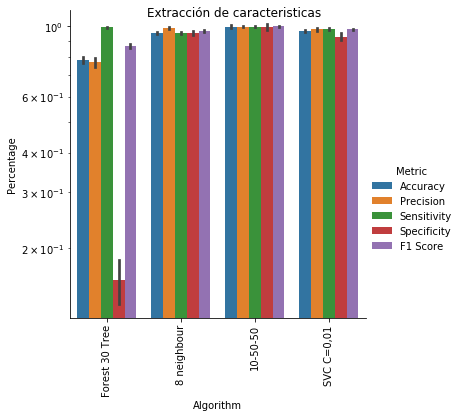

In [109]:
graph = sns.catplot(x="Algorithm", y="Percentage", ci="sd", hue='Metric', kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Extracción de caracteristicas')
graph.savefig('Graphs/featureExtraction.jpg')

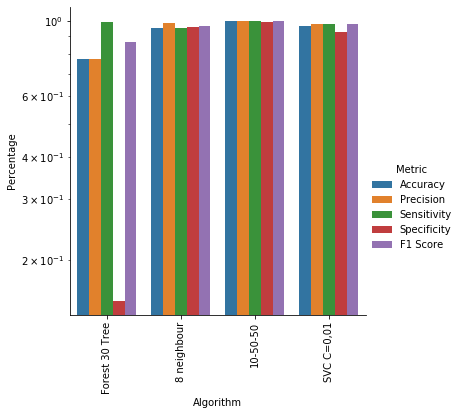

In [66]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=feature_extraction_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

In [110]:
dfCopy = feature_wrapper_stacked.copy()
duplicates = 30 # increase this number to increase precision
for index, row in feature_wrapper_stacked.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

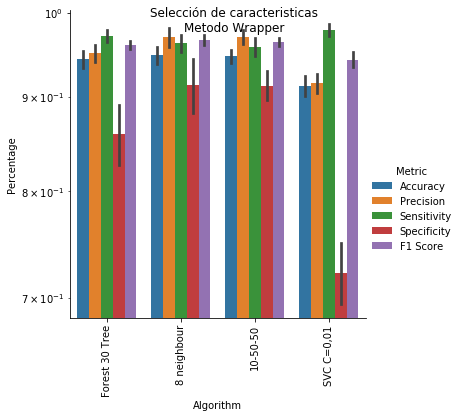

In [111]:
graph = sns.catplot(x="Algorithm", y="Percentage", ci="sd", hue='Metric', kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Selección de caracteristicas\nMetodo Wrapper')
graph.savefig('Graphs/featureWrapper.jpg')

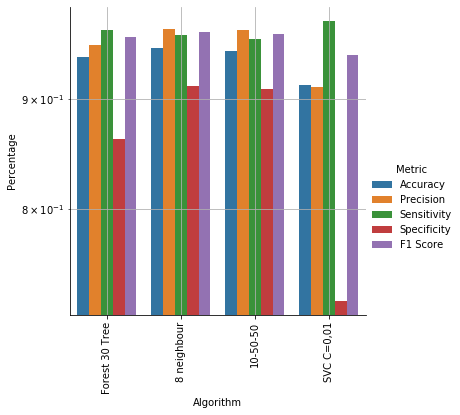

In [67]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=feature_wrapper_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
plt.grid(which="both")
plt.show()

In [112]:
dfCopy = feature_filtering_stacked.copy()
duplicates = 30 # increase this number to increase precision
for index, row in feature_filtering_stacked.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

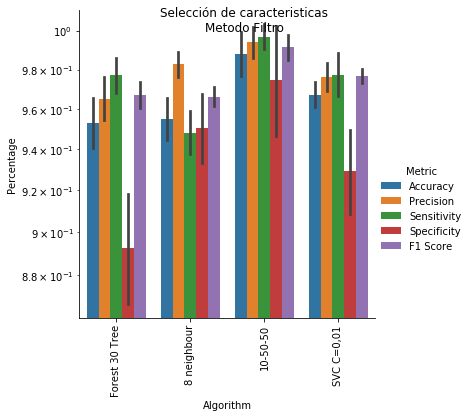

In [113]:
graph = sns.catplot(x="Algorithm", y="Percentage", ci="sd", hue='Metric', kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Selección de caracteristicas\nMetodo Filtro')
graph.savefig('Graphs/featureFilter.jpg')

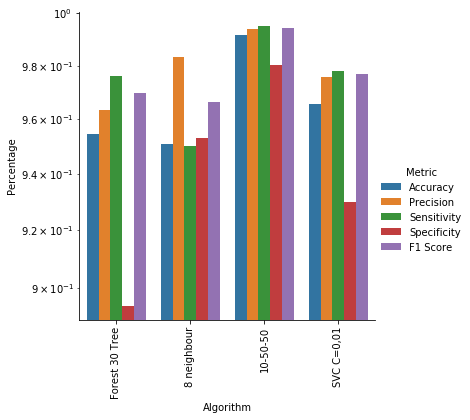

In [68]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=feature_filtering_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

In [69]:
feature_comparison = pd.DataFrame(columns=without_features.columns.name)
feature_comparison = feature_comparison.append(without_features.iloc[2], ignore_index=True)
feature_comparison = feature_comparison.append(feature_extraction.iloc[2], ignore_index=True)
feature_comparison = feature_comparison.append(feature_wrapper.iloc[1], ignore_index=True)
feature_comparison = feature_comparison.append(feature_filtering.iloc[2], ignore_index=True)
feature_comparison['Method'] = ['Without', 'Extraction', 'Wrapper', 'Filter']
feature_comparison.head()


,Accuracy,Accuracy.1,Algorithm,F1 Score,F1 Score.1,Precision,Precision.1,Sensitivity,Sensitivity.1,Specificity,Specificity.1,Time,Method
0,0.994061,0.011885,10-50-50,0.996090,0.007729,0.996691,0.005714,0.995503,0.009984,0.989604,0.019436,641.318006,Without
1,0.994636,0.009770,10-50-50,0.996464,0.006039,0.996459,0.005919,0.996473,0.006475,0.988848,0.019913,267.941657,Extraction
2,0.949771,0.011773,8 neighbour,0.966128,0.007782,0.969634,0.010154,0.962776,0.011955,0.912654,0.028373,1.223753,Wrapper
3,0.991379,0.011341,10-50-50,0.994296,0.007328,0.993714,0.009600,0.994918,0.007329,0.980350,0.032524,552.696497,Filter


In [70]:
feature_comparison_stacked = pd.melt(feature_comparison, id_vars=['Method', 'Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
feature_comparison_stacked_2 = pd.melt(feature_comparison, id_vars=['Method', 'Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')
feature_comparison_stacked['Std'] = feature_comparison_stacked_2['Std']
feature_comparison_stacked.head()

,Method,Algorithm,Metric,Percentage,Std
0,Without,10-50-50,Accuracy,0.994061,0.011885
1,Extraction,10-50-50,Accuracy,0.994636,0.009770
2,Wrapper,8 neighbour,Accuracy,0.949771,0.011773
3,Filter,10-50-50,Accuracy,0.991379,0.011341
4,Without,10-50-50,Precision,0.996691,0.005714


In [89]:
dfCopy = feature_comparison_stacked.copy()
duplicates = 30 # increase this number to increase precision
for index, row in feature_comparison_stacked.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

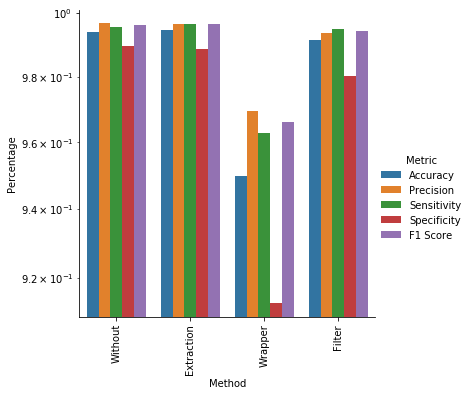

In [72]:
graph = sns.catplot(x="Method", y="Percentage", ci="sd", capsize=0.1, hue='Metric', kind="bar", data=feature_comparison_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

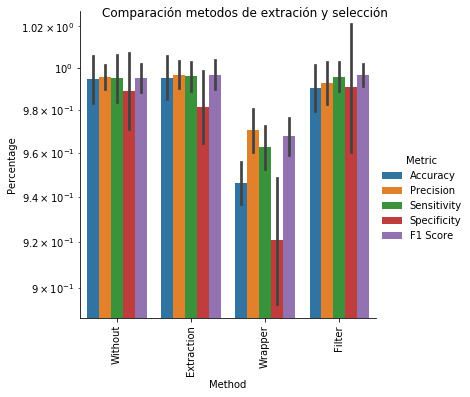

In [90]:
graph = sns.catplot(x="Method", y="Percentage", ci="sd", hue='Metric', kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Comparación metodos de extración y selección')
graph.savefig('Graphs/comparisonfeatures.jpg')
